In [4]:
# install sklearn and pandas
!pip install --user --upgrade pip -q
!pip install --user sklearn -q
!pip install --user pandas  -q
import pickle, sklearn

from ipywidgets import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


[9.99999684e-01 2.05947153e-02 9.99404879e-01 9.65768696e-05
 1.28362672e-04 9.99271397e-01 5.34073410e-01 2.28152356e-01
 8.61461302e-01 9.98786735e-01 9.91887281e-01 9.99998079e-01
 9.98203284e-01 7.82400624e-01 9.99336940e-01 9.99999504e-01
 9.99927946e-01 9.39848949e-01 9.99999741e-01 9.99995988e-01
 4.80705438e-06 9.99954337e-01 9.96469000e-01 9.95211894e-01
 9.99993708e-01 9.29198745e-01 3.05388519e-05 9.99999858e-01
 3.61344530e-02 4.33567318e-02 9.95713707e-01 9.99965307e-01
 7.26627254e-01 9.20190679e-01 9.93967540e-01 9.98249793e-01
 9.99999704e-01 9.03742500e-01 6.78318103e-02 7.17875893e-01
 9.92101075e-01 9.99963063e-01 5.72122835e-02 9.99999561e-01
 3.32002920e-02 7.58053813e-02 9.99988475e-01 6.39700864e-04
 6.05013989e-01 9.99647558e-01]


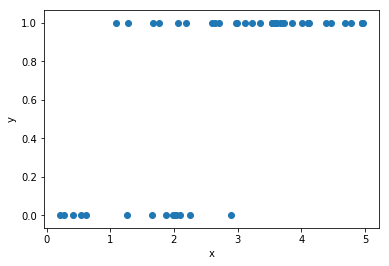

In [49]:
np.random.seed(6)
N=50
x=np.random.rand(N)*5
Exp=-15+5*x+10*np.random.rand(N)
p=np.exp(Exp)/(1+np.exp(Exp))
print(p)
y=1*(np.random.rand(N)<p)
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
        
plt.show()

In [50]:
output = Output()
with output:
    plt.scatter(x,y)
    plt.xlabel("x")
    plt.ylabel("y")
     
    plt.xlim(np.min(x)-1,np.max(x)+1)
    plt.ylim(-0.5,np.max(y)+0.5)
    plt.show()

def draw_tree_stage1(change):
    output.clear_output(wait=True)
    with output:
        plt.scatter(x,y)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(np.min(x)-1,np.max(x)+1)
        plt.ylim(-0.5,np.max(y)+0.5)
        x_v=np.linspace(np.min(x),np.max(x),1000)
        
        ep_v=float(b0.value)+float(b1.value)*x_v
        p=np.exp(ep_v)/(1+np.exp(ep_v))
        plt.plot(x_v,p)
    
        plt.show()
 
 
    
            
b0=FloatSlider(min=-5,max=5,step=0.4,value=0)
b1=FloatSlider(min=-5,max=10,step=0.4,value=0)


display(b0)
display(b1)


b0.observe(draw_tree_stage1,names="value")
b1.observe(draw_tree_stage1,"value")
display(output)
        
    
#interactive(draw_tree_stage1,feature=["Feature1", "Feature2", "Best"],split=IntSlider(min=0,max=8,step=1,value=0)) 

FloatSlider(value=0.0, max=5.0, min=-5.0, step=0.4)

FloatSlider(value=0.0, max=10.0, min=-5.0, step=0.4)

Output()

In [19]:
from sklearn.linear_model import LogisticRegression

In [51]:
output = Output()
with output:
    plt.scatter(x,y)
    plt.xlabel("x")
    plt.ylabel("y")
     
    plt.xlim(np.min(x)-1,np.max(x)+1)
    plt.ylim(-0.5,np.max(y)+0.5)
    plt.show()

def draw_tree_stage1(change):
    output.clear_output(wait=True)
    with output:
        plt.scatter(x,y)
        plt.xlabel("x")
        plt.ylabel("y")

        plt.xlim(np.min(x)-1,np.max(x)+1)
        plt.ylim(-0.5,np.max(y)+0.5)
        model=LogisticRegression()
        X=x.reshape(-1,1)
        X_array=X
        if terms.value>1:
            for i in range(2,terms.value+1):
                X_array=np.append(X_array,X**i,axis=1)
        model.fit(X_array,y)
        params=np.append( model.intercept_, model.coef_)
        predict=model.predict(X_array)
   
        inter=model.intercept_
        x_v=np.linspace(np.min(x),np.max(x),1000)
        X=x_v.reshape(-1,1)
        X_array=X
        if terms.value>1:
            for i in range(2,terms.value+1):
                X_array=np.append(X_array,X**i,axis=1)
        ex_v=model.intercept_+X_array@model.coef_.reshape(-1,1)
        p=np.exp(ex_v)/(1+np.exp(ex_v))
       
     
        print("accuracy=",np.mean(predict==y))
        plt.plot(x_v,p)
    
        plt.show()
 
 
    
            
terms=IntSlider(min=1,max=5,step=1,value=1)
 


display(terms)
 


terms.observe(draw_tree_stage1,names="value")
 
display(output)
        
    
#interactive(draw_tree_stage1,feature=["Feature1", "Feature2", "Best"],split=IntSlider(min=0,max=8,step=1,value=0)) 

IntSlider(value=1, max=5, min=1)

Output()